# 可视化探索语义分割数据集

2025-4-30

## 进入`mmsegmentation`主目录

In [1]:
import os
os.chdir('mmsegmentation')

In [9]:
os.getcwd()

'/home/featurize/work/mmsegmentation'

## 导入工具包

In [8]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 查看单张图像及其语义分割标注

In [12]:
# 指定单张图像路径
img_path = 'window_dataset/img_dir/train/00000.jpg'
mask_path = 'window_dataset/ann_dir/train/00000.png'

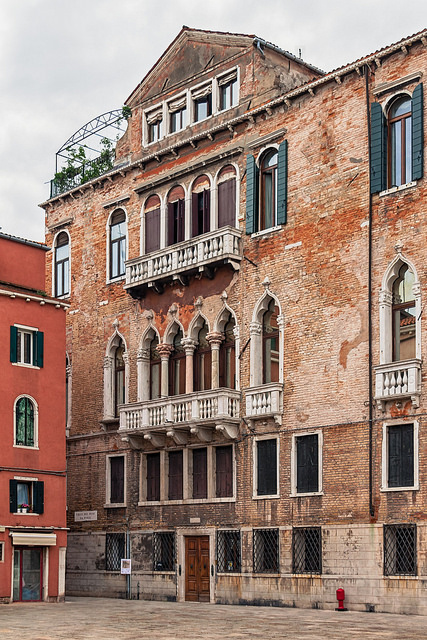

In [13]:
Image.open(img_path)

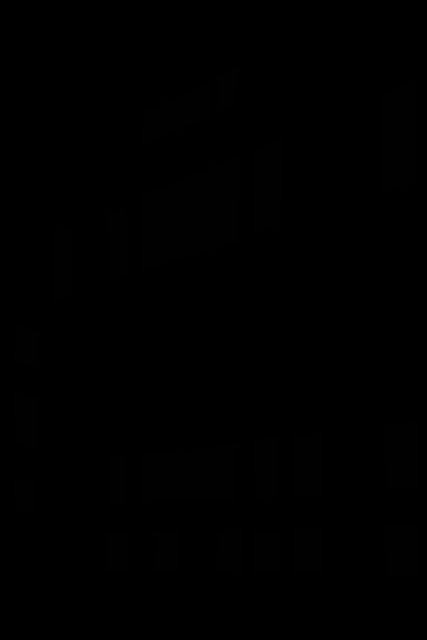

In [14]:
Image.open(mask_path)

In [15]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [16]:
img.shape

(640, 427, 3)

In [17]:
mask.shape

(640, 427, 3)

## mask灰度图标注含义

In [18]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 1], dtype=uint8)

| 类别名称   | 类别语义 | 标注类别          | 灰度图像素值 |
| ---------- | -------- | ----------------- | ------------ |
| /          | 背景     | /                 | 0            |
| red        | 西瓜红瓤 | 多段线（polygon） | 1            |
| green      | 西瓜外壳 | 多段线（polygon） | 2            |
| white      | 西瓜白皮 | 多段线（polygon） | 3            |
| seed-black | 西瓜黑籽 | 多段线（polygon） | 4            |
| seed-white | 西瓜白籽 | 多段线（polygon） | 5            |

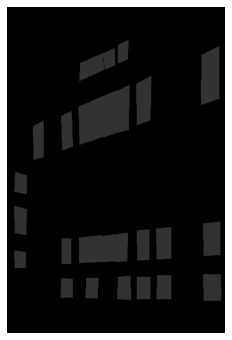

In [19]:
plt.figure(figsize=(10, 6))
plt.imshow(mask*50)
plt.axis('off')
plt.show()

## 将语义分割标注叠加在原图上显示

In [20]:
# 每个类别的 BGR 配色
palette = [
    ['background', [127,127,127]],
    ['red', [0,0,200]],
    ['green', [0,200,0]],
    ['white', [144,238,144]],
    ['seed-black', [30,30,30]],
    ['seed-white', [8,189,251]]
]

In [21]:
palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

In [22]:
palette_dict

{0: [127, 127, 127],
 1: [0, 0, 200],
 2: [0, 200, 0],
 3: [144, 238, 144],
 4: [30, 30, 30],
 5: [8, 189, 251]}

In [23]:
mask = mask[:,:,0]

# 将整数ID，映射为对应类别的颜色
viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
for idx in palette_dict.keys():
    viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
viz_mask_bgr = viz_mask_bgr.astype('uint8')

# 将语义分割标注图和原图叠加显示
opacity = 0.2 # 透明度越大，可视化效果越接近原图
label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)

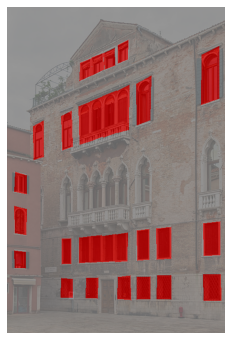

In [24]:
plt.figure(figsize=(10, 6))
plt.imshow(label_viz[:,:,::-1])
plt.axis('off')
plt.show()

In [25]:
cv2.imwrite('outputs/D-1.jpg', label_viz)

True

## 批量可视化图像和标注

In [26]:
# 指定图像和标注路径

# 训练集
PATH_IMAGE = 'window_dataset/img_dir/train'
PATH_MASKS = 'window_dataset/ann_dir/train'

# 测试集
PATH_IMAGE = 'window_dataset/img_dir/val'
PATH_MASKS = 'window_dataset/ann_dir/val'

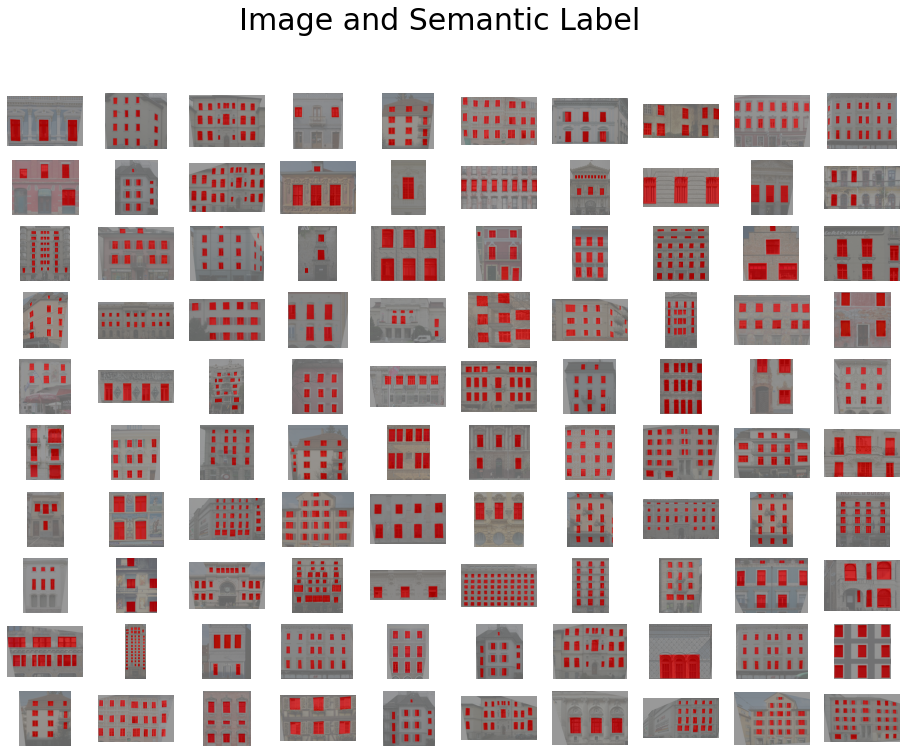

In [28]:
# n 行 n 列可视化 只用改n和opacity
n = 10

# 透明度越大，可视化效果越接近原图
opacity = 0.2 

fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(16, 12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    mask = mask[:,:,0]

    # 将预测的整数ID，映射为对应类别的颜色
    viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
    for idx in palette_dict.keys():
        viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
    viz_mask_bgr = viz_mask_bgr.astype('uint8')

    # 将语义分割标注图和原图叠加显示
    label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)
    
    # 可视化
    axes[i//n, i%n].imshow(label_viz[:,:,::-1])
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
#开这个命令可以把排版搞的很漂亮
# plt.tight_layout()
plt.savefig('outputs/D-2.jpg')
plt.show()